In [13]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from tqdm import tqdm
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Cargamos base de datos desde sklearn 
from sklearn.datasets import load_iris


In [9]:
#Carga directa
iris = load_iris()
X=iris.data
y= iris.target

In [10]:
#usamos la particiopn de datos directamente y vamos a asignar bases de datos y etiquetas en una línea
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

In [12]:
len(X_test)

38

In [14]:
#Construyo clasificador 
knn= KNeighborsClassifier(n_neighbors=3)

In [15]:
#Entreno clasificador 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred= knn.predict(X_test)

In [17]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [18]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [19]:
#Medición de accuracy
print('Accuracy: ', knn.score(X_test,y_test))

Accuracy:  0.9736842105263158


In [26]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [27]:
print(scores)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [28]:
print(scores.mean())

0.9666666666666668


In [29]:
#Vamos a medir cual es el mejor numero de vecinos para construir este clasificador
import matplotlib.pyplot as plt


In [30]:
#Establecer un rango de vecinos a revisar
k_range=range(1,31)

In [31]:
k_scores=[]

In [32]:
for k in tqdm(k_range):
  knn=KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
  k_scores.append(scores.mean())

100%|██████████| 30/30 [00:01<00:00, 19.06it/s]


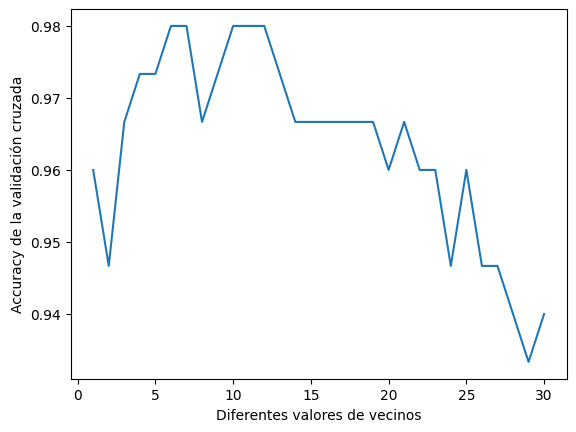

In [34]:
#Grafico de resultados
plt.plot(k_range, k_scores)
plt.xlabel('Diferentes valores de vecinos')
plt.ylabel('Accuracy de la validación cruzada')
plt.show()

In [35]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [36]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [37]:
from sklearn import metrics

In [38]:
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)

In [39]:
confusion_matrix

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 12]])

In [40]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1,2])

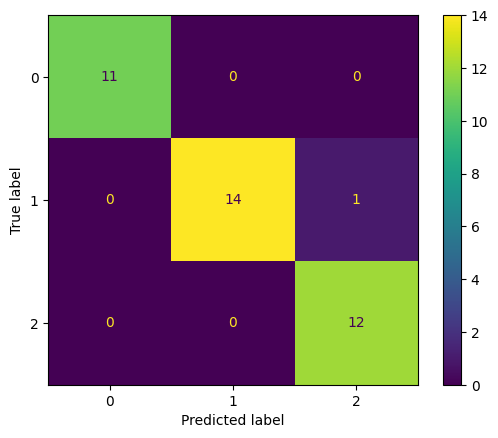

In [41]:
cm_display.plot()
plt.show()

In [43]:
knn

KNeighborsClassifier(n_neighbors=30)